# Uniswap exchange simulator - Market CAP

Market cap = (Token price) * (Total tokens)

In [51]:
Ra = 1000 # in USD
Rb  = 1000000000 #trillion or whatever
k = Ra*Rb

def init():
    global Rb 
    global Ra
    global k
    BNB = 1
    Ra = 1000
    Rb  = 1000000000
    k = Ra*Rb


In [52]:
from sympy.solvers import solve
from sympy import Symbol

def buy(bnb = 0):
    global Rb 
    global Ra
    global k
    deltaB = Symbol('deltaB')
    
    token =solve((Ra + bnb)*(Rb - deltaB)-k,deltaB)
    
    token =float(token[0])
    Ra = Ra+bnb
    Rb= Rb-token
    k = Ra*Rb
    return token

def sell(token = 0):
    global Rb 
    global Ra
    global k
    bnb = Symbol('bnb')
    
    bnb =solve((Ra - bnb)*(Rb + token)-k,bnb)
    
    bnb =float(bnb[0])
    Ra = Ra-bnb
    Rb= Rb+token
    k = Ra*Rb
    return bnb

def price(token =1):
    global Rb 
    global Ra
    global k
    return token*Ra/Rb
def mcap ():
    global Rb 
    global Ra
    global k
    return price()*1000000000

In [70]:
#buying selling
init()
token = buy(10)
print("buying for 10 USD will give this many tokens : ",token)
print("Value of those tokens in USD:",price(token))
bnb =sell(token)
print("selling thos tokens back will give this many USD : ",bnb)
print("price impact: ",(-price(token)/bnb+1)*100,"%")

buying for 10 USD will give this many tokens :  9900990.099009901
Value of those tokens in USD: 10.1
selling thos tokens back will give this many USD :  10.0
price impact:  0.990099009900991 %


In [62]:
#price going up
token = buy(1)
print("buying for 1 USD  will give this many tokens : ",token)
buy(1),buy(1),buy(1),buy(1),buy(1)
bnb =sell(token)
print("selling thos tokens back will give this many USD : ",bnb)

buying for 1 USD  will give this many tokens :  999000.999000999
selling thos tokens back will give this many USD :  1.0100099201002741


In [55]:
import numpy as np

x = np.arange(0,100)
y = []
for buy_token in x:
    init()
    buy(buy_token)
    y.append(mcap())

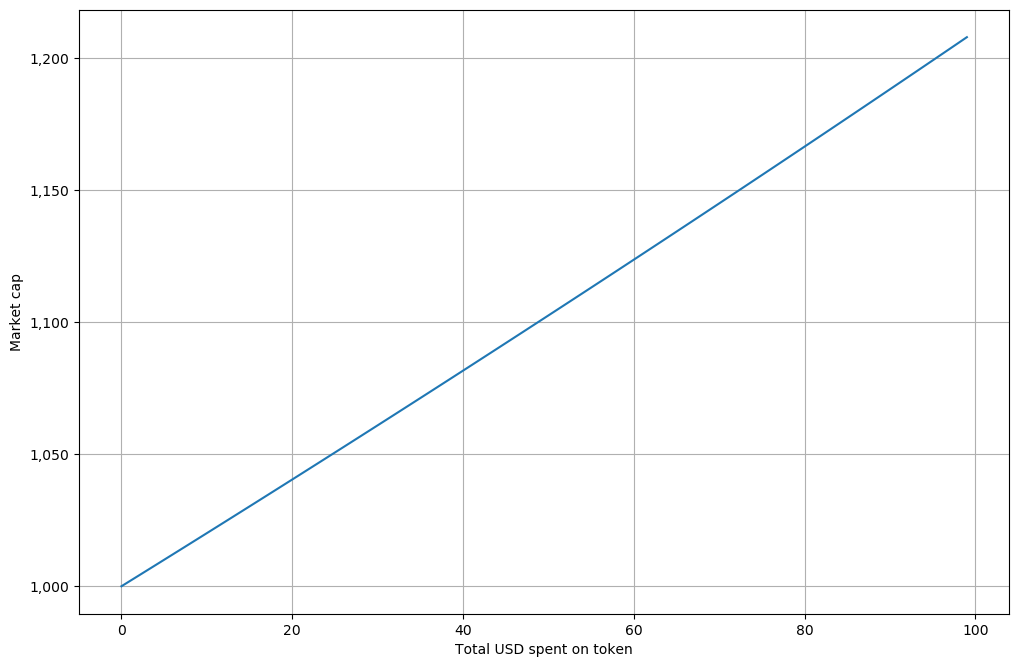

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.plot(x,y)
plt.xlabel("Total USD spent on token")
plt.ylabel("Market cap")
plt.show()

In [49]:
x = np.arange(1000,1000000,1000)
y = []
for buy_token in x:
    init()
    buy(buy_token)
    y.append(mcap())

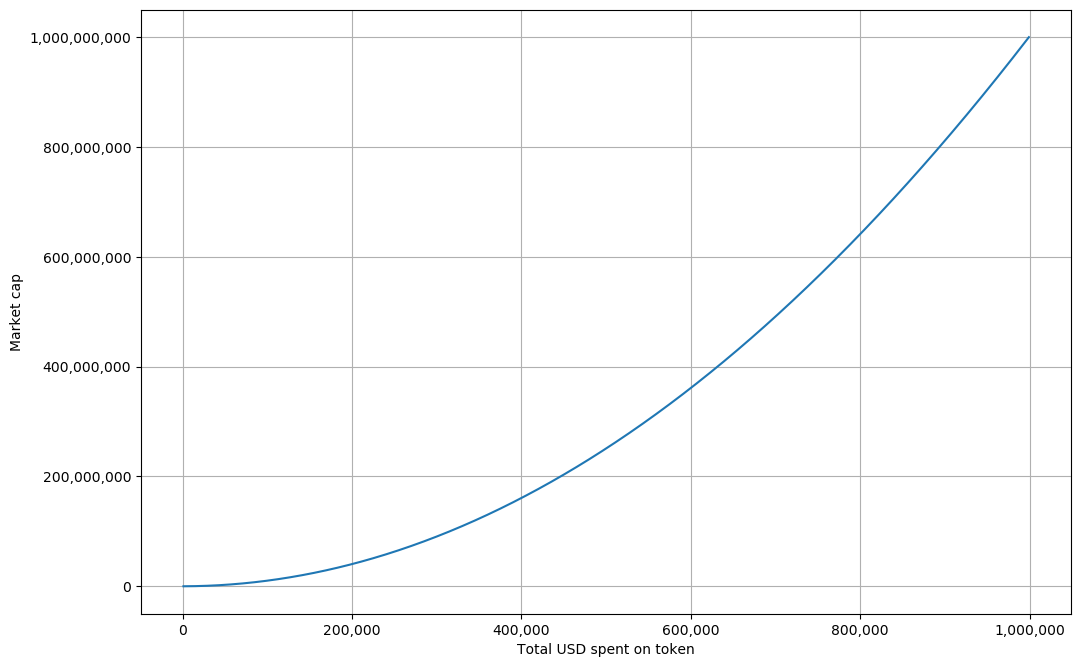

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.plot(x,y)
plt.xlabel("Total USD spent on token")
plt.ylabel("Market cap")
plt.show()